<img src="https://devra.ai/analyst/notebook/2338/image.jpg" style="width: 100%; height: auto;" />

<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">
  <div style="font-size:150%; color:#FEE100"><b>Microsoft Stock Price History Notebook</b></div>
  <div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div>
</div>

## Table of Contents

1. [Introduction](#Introduction)
2. [Data Loading](#Data-Loading)
3. [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
5. [Predictive Modeling](#Predictive-Modeling)
6. [Conclusion and Future Work](#Conclusion-and-Future-Work)


## Introduction

Stock market data invariably tells stories of volatility and resilience. In this notebook, we will dive into Microsoft's stock price history data to unravel patterns, trends, and relations among stock-related features. If you find these insights useful, please consider an upvote.


In [1]:
# Import necessary libraries and set up environment
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Set backend for matplotlib to avoid GUI issues
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Configure seaborn and matplotlib styling
sns.set(style='whitegrid')
plt.style.use('seaborn-darkgrid')


In [2]:
# Data Loading

# Reading the Microsoft stock data CSV file
data_file = '/kaggle/input/microsoft-stock-price-history/Microsoft_stock_data.csv'
df = pd.read_csv(data_file, encoding='ascii')

# Let's display the first few rows (this output is not computed here, run the cell to see the result)
df.head()

,Date,Close,High,Low,Open,Volume
0,1986-03-13,0.059598,0.062259,0.054277,0.054277,1031788800
1,1986-03-14,0.061726,0.062791,0.059598,0.059598,308160000
2,1986-03-17,0.062791,0.063323,0.061726,0.061726,133171200
3,1986-03-18,0.061194,0.063323,0.060662,0.062791,67766400
4,1986-03-19,0.060130,0.061726,0.059598,0.061194,47894400


In [3]:
# Data Cleaning and Preprocessing

# Convert the 'Date' column from string to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check for missing data in the dataset
missing_values = df.isnull().sum()
print('Missing values per column:')
print(missing_values)

# If date conversion fails or if there are other missing values, it might be common
# when integrating data sources. We handle it here by dropping or imputing if necessary.
df.dropna(inplace=True)  # In this case, dropping missing data for simplicity

# Sort the dataframe by Date for any time-series analysis
df.sort_values('Date', inplace=True)

# Additional feature engineering: extract Year, Month, and Day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.info()

Missing values per column:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9892 entries, 0 to 9891
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9892 non-null   datetime64[ns]
 1   Close   9892 non-null   float64       
 2   High    9892 non-null   float64       
 3   Low     9892 non-null   float64       
 4   Open    9892 non-null   float64       
 5   Volume  9892 non-null   int64         
 6   Year    9892 non-null   int32         
 7   Month   9892 non-null   int32         
 8   Day     9892 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(1)
memory usage: 579.7 KB


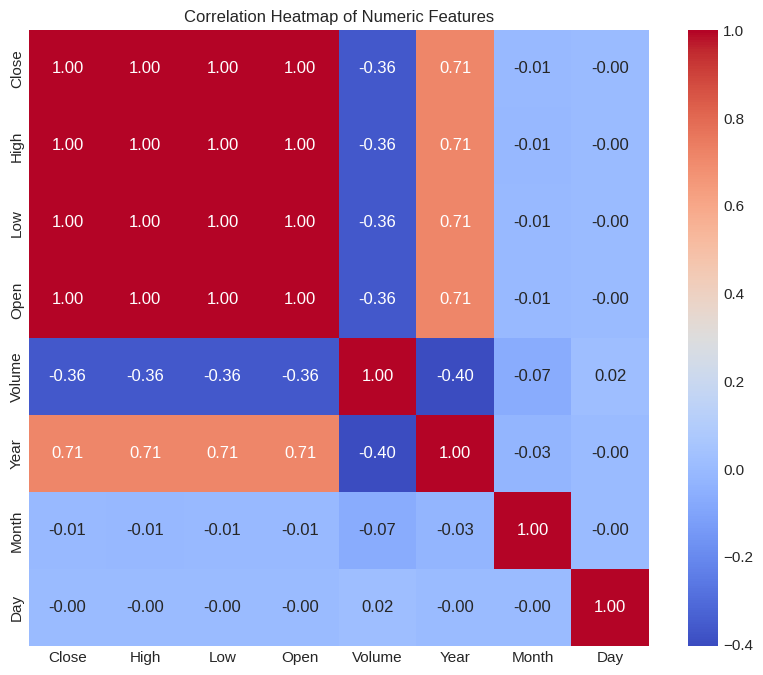

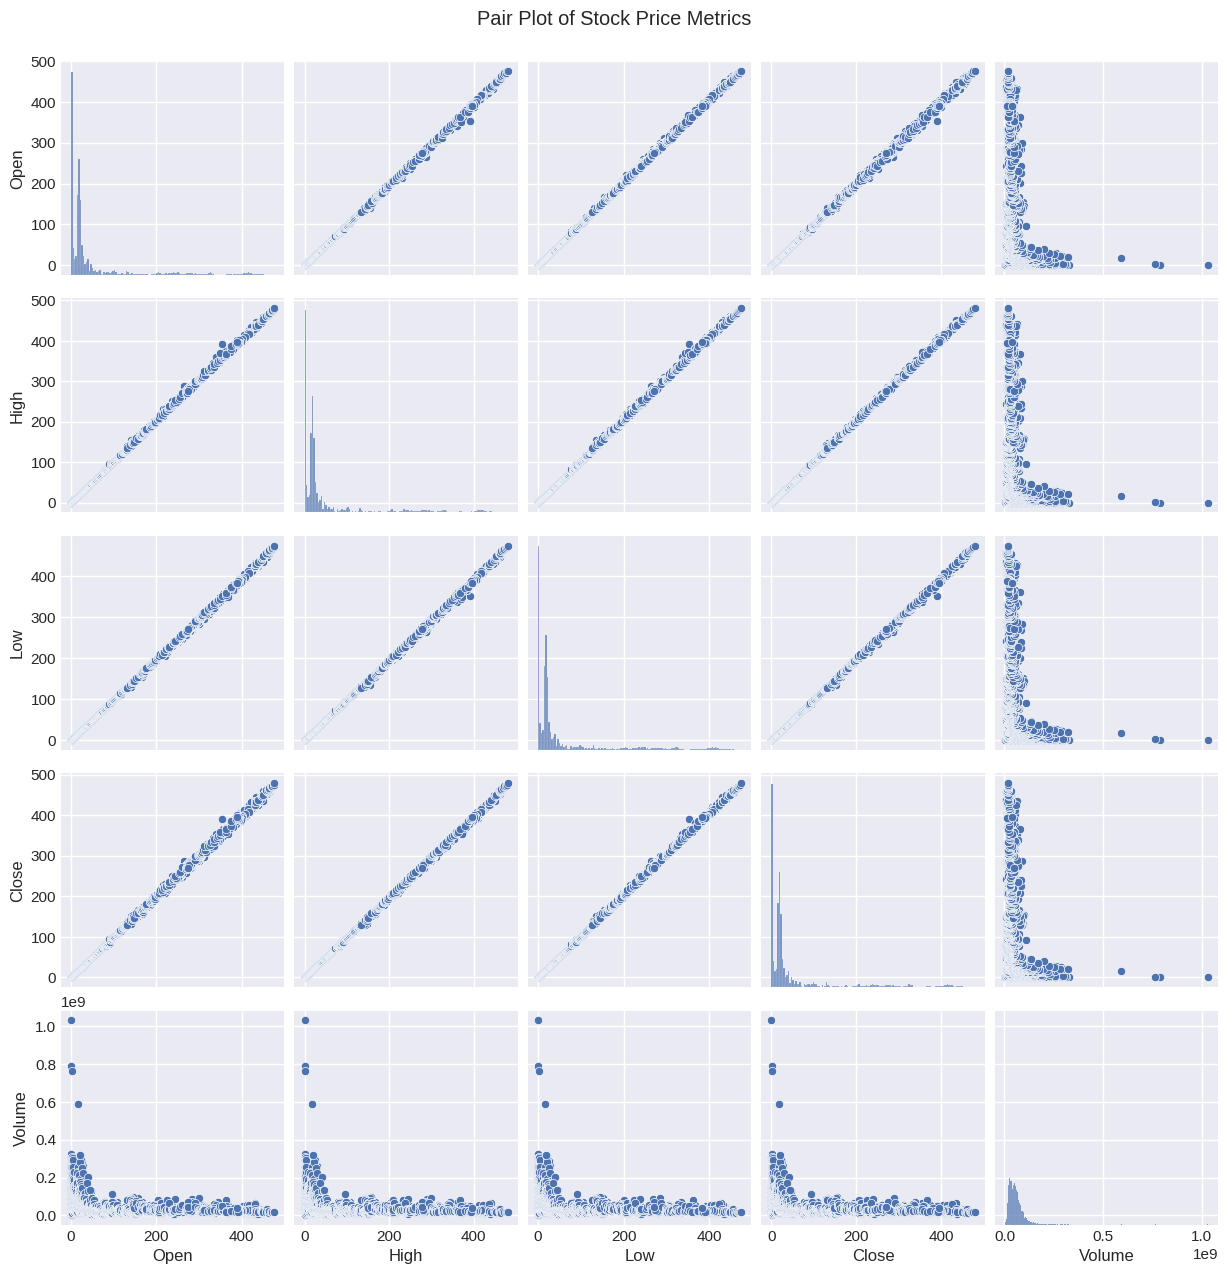

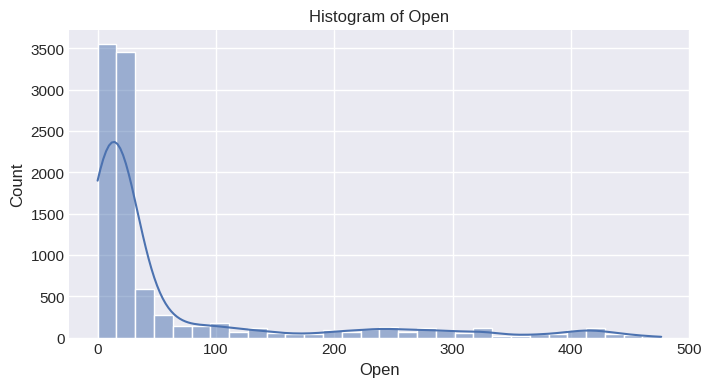

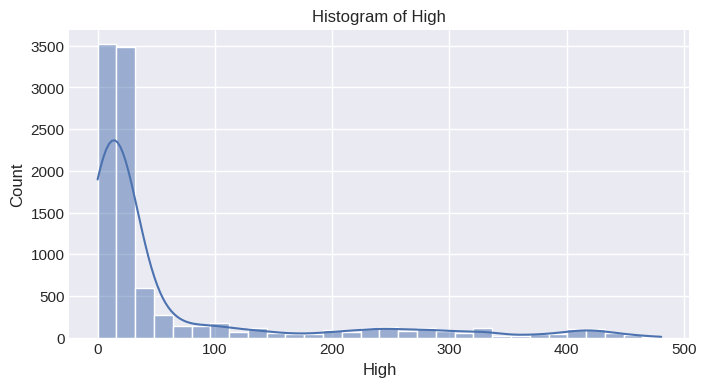

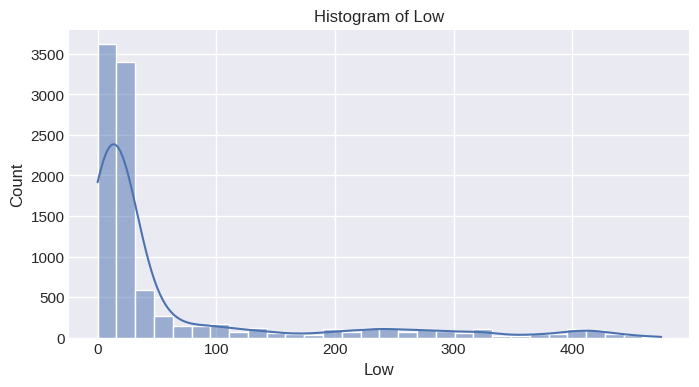

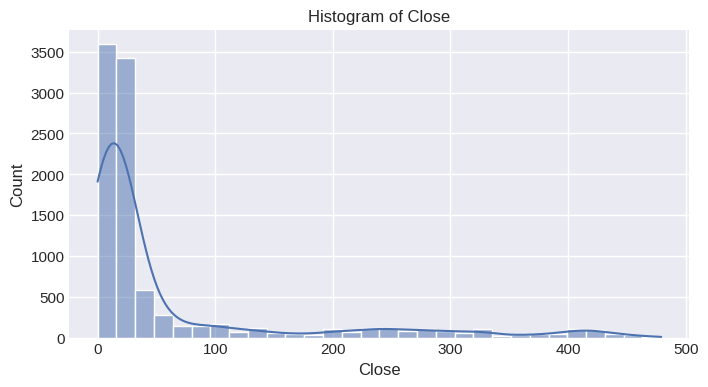

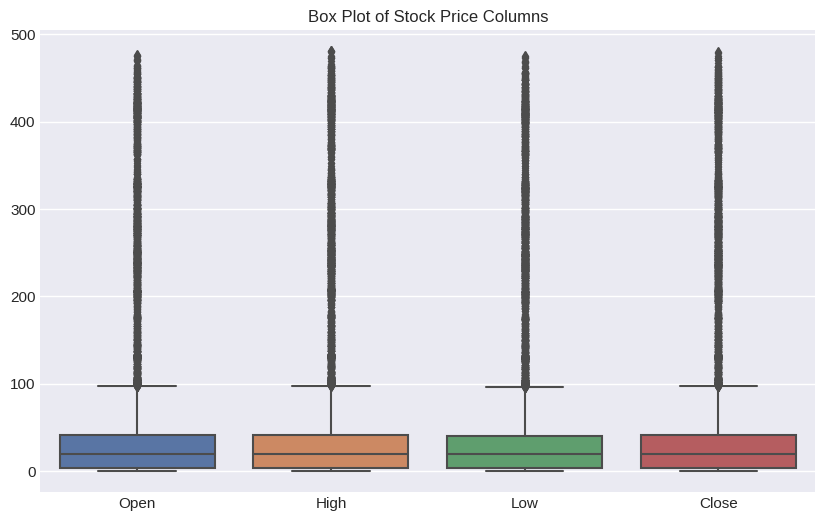

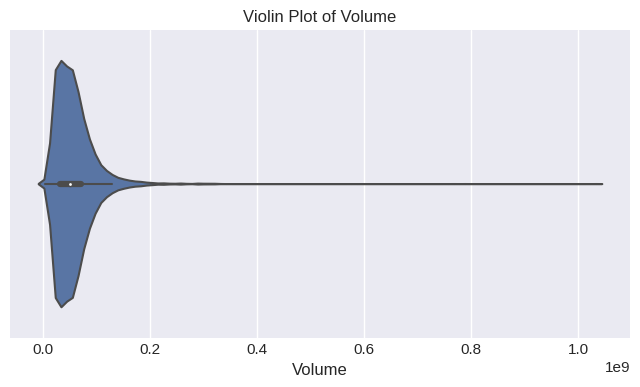

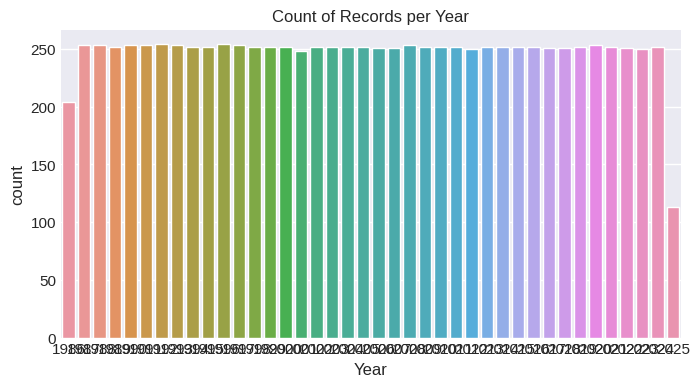

In [4]:
# Exploratory Data Analysis

# 1. Correlation Heatmap
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10,8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print('Not enough numeric features for a correlation heatmap.')

# 2. Pair Plot for key features (Open, High, Low, Close, Volume)
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.suptitle('Pair Plot of Stock Price Metrics', y=1.02)
plt.show()

# 3. Histograms for the stock price columns
price_columns = ['Open', 'High', 'Low', 'Close']
for col in price_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

# 4. Box Plot for stock prices to check for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df[price_columns])
plt.title('Box Plot of Stock Price Columns')
plt.show()

# 5. Violin Plot to view distribution and density for the 'Volume'
plt.figure(figsize=(8, 4))
sns.violinplot(x=df['Volume'])
plt.title('Violin Plot of Volume')
plt.show()

# 6. Count plot for the number of records per year
plt.figure(figsize=(8, 4))
sns.countplot(x='Year', data=df)
plt.title('Count of Records per Year')
plt.show()

Linear Regression R^2 Score: 0.9998


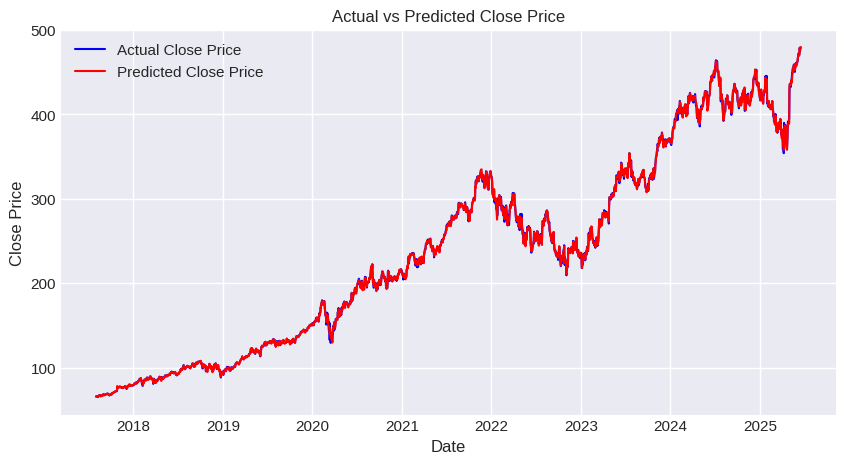

In [5]:
# Predictive Modeling

# In our predictive modeling exercise, we use historical data to predict the 'Close' price using 
# available features: 'Open', 'High', 'Low', and 'Volume'.
# Note: While stock price prediction is inherently complex and requires advanced methods,
# here we demonstrate a simple linear regression for educational purposes.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Set features and target. We exclude 'Date' and engineered date columns.
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

X = df[features]
y = df[target]

# Perform a time-series aware split: use the first 80% for training and the rest for testing
split_index = int(0.8 * len(df))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using R^2 score
r2 = r2_score(y_test, y_pred)
print(f'Linear Regression R^2 Score: {r2:.4f}')

# Plot actual vs predicted Close prices
plt.figure(figsize=(10,5))
plt.plot(df['Date'].iloc[split_index:], y_test, label='Actual Close Price', color='blue')
plt.plot(df['Date'].iloc[split_index:], y_pred, label='Predicted Close Price', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

## Conclusion and Future Work

This notebook provided a comprehensive analysis of Microsoft stock price history. We started with basic data cleaning, visualized the data through multiple techniques (heatmaps, pair plots, histograms, and more), and developed a simple linear regression model to predict the closing price. 

The merits of this approach lie in its simplicity and the ease of exploring relationships in the dataset using multiple visualizations. Future analysis could involve more robust time-series models (such as ARIMA or LSTM), feature engineering (including lagged variables), and a detailed train-validation-test split optimized for time-series data. 

If you found this notebook engaging and useful, please consider an upvote.
